In [257]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [258]:
# Generate dataset
N = 5000 #number of entries

x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2
data = np.array([x1,x2,x3])

In [259]:
# Find eigenvectors and eigenvalues of the covariance matrix
cov_mtrx = np.cov(data)
l, V = la.eig(cov_mtrx) 
l = np.real_if_close(l) #covariance matrix is semi-positive definite so its eigenvalues are real

#sorting them in non-increasing order as in la.svd() output
idx = np.argsort(-l)
l = l[idx]
V = V[:,idx]

print("The covariance matrix of the dataset is:\n",cov_mtrx,'\n')
print("Its eigenvalues and corresponding eigenvectors are:")
print("1st eigenvalue: ", l[0], "with eigenvector: ", V[:,0])
print("2nd eigenvalue: ", l[1], "with eigenvector: ", V[:,1])
print("3rd eigenvalue: ", l[2], "with eigenvector: ", V[:,2])

The covariance matrix of the dataset is:
 [[ 0.97406344  0.91002313  2.85815001]
 [ 0.91002313  9.81996869 11.64001494]
 [ 2.85815001 11.64001494 17.35631497]] 

Its eigenvalues and corresponding eigenvectors are:
1st eigenvalue:  26.14529069514469 with eigenvector:  [-0.11253433 -0.58101022 -0.80607887]
2nd eigenvalue:  2.0050564037597014 with eigenvector:  [ 0.56627675 -0.70410259  0.42845091]
3rd eigenvalue:  -1.9090898780592583e-15 with eigenvector:  [-0.81649658 -0.40824829  0.40824829]


In [260]:
# Using SVD:
U, spectrum, Vt = la.svd(cov_mtrx)

print("Using SVD we have:")
print("1st eigenvalue: ", spectrum[0], "with eigenvector: ", U[:,0])
print("2nd eigenvalue: ", spectrum[1], "with eigenvector: ", U[:,1])
print("3rd eigenvalue: ", spectrum[2], "with eigenvector: ", U[:,2])

Using SVD we have:
1st eigenvalue:  26.145290695144674 with eigenvector:  [-0.11253433 -0.58101022 -0.80607887]
2nd eigenvalue:  2.0050564037596996 with eigenvector:  [ 0.56627675 -0.70410259  0.42845091]
3rd eigenvalue:  1.3834776335700252e-16 with eigenvector:  [-0.81649658 -0.40824829  0.40824829]


The smallest eigenvalue does not coincide. Probably, since it's so small, the la.svd() and la.eig() methods become unreliable as they are numerical methods. In fact, if we check the definition of eigenvalues $\lambda$ and eigenvectors $V$
$$ 
AV= \lambda V
$$


In [261]:
#1st eigenvalue with eig
check1 = np.dot(cov_mtrx, V[:,0])
check2 = l[0] * V[:,0]
print ('Checking accuracy for 1st eigenvalue')
print (check1, check2, "--> equal")

#2nd eigenvalue with eig
check1 = np.dot(cov_mtrx, V[:,1])
check2 = l[1] * V[:,1]
print ('Checking accuracy for 2nd eigenvalue')
print (check1, check2, "--> equal")

#3rd eigenvalue with eig
check1 = np.dot(cov_mtrx, V[:,2])
check2 = l[2] * V[:,2]
print ('Checking accuracy for 3rd eigenvalue')
print (check1, check2, "--> NOT equal")


Checking accuracy for 1st eigenvalue
[ -2.94224265 -15.19068114 -21.07516644] [ -2.94224265 -15.19068114 -21.07516644] --> equal
Checking accuracy for 2nd eigenvalue
[ 1.13541683 -1.41176541  0.85906825] [ 1.13541683 -1.41176541  0.85906825] --> equal
Checking accuracy for 3rd eigenvalue
[ 6.66133815e-16  0.00000000e+00 -8.88178420e-16] [ 1.55876536e-15  7.79382679e-16 -7.79382679e-16] --> NOT equal


We can see that th result is not 100% accurate for the 3rd eigenvalue

In [262]:
# Variability in principal components
var1 = l[0]/l.sum()
var2 = l[1]/l.sum()
var3 = l[2]/l.sum()

print("The 1st eigenvalue accounts for ", var1*100,"% of the variability of the dataset")
print("The 2nd eigenvalue accounts for ", var2*100,"% of the variability of the dataset")
print("The 3rd eigenvalue accounts for ", var3*100,"% of the variability of the dataset")
print("The 1st and 2nd eigenvalue account for ", (var1+var2)*100,"% of the variability of the dataset")

The 1st eigenvalue accounts for  92.87732972984288 % of the variability of the dataset
The 2nd eigenvalue accounts for  7.122670270157124 % of the variability of the dataset
The 3rd eigenvalue accounts for  -6.781763192303798e-15 % of the variability of the dataset
The 1st and 2nd eigenvalue account for  100.0 % of the variability of the dataset


As expected, since x3 is just a linear combination of x1 and x2, the first two eigenvalues account for the full variability of the dataset (we don't get exactly 0 for the 3rd because of the approximation errors we highlighted before).

Thus, to reduce the dimensionality in such a way that at least 99% of the total variability is retained, we should keep only the first two principal components.

In [263]:
Lambda = np.diag(l)
Lambda[2,2] = 0
RedLamb = np.delete(Lambda, 2,0)
RedLamb = np.delete(RedLamb, 2,1)
print("Reduced matrix of eigenvectors: \n", RedLamb)

Reduced matrix of eigenvectors: 
 [[26.1452907  0.       ]
 [ 0.         2.0050564]]


Text(0, 0.5, 'x2')

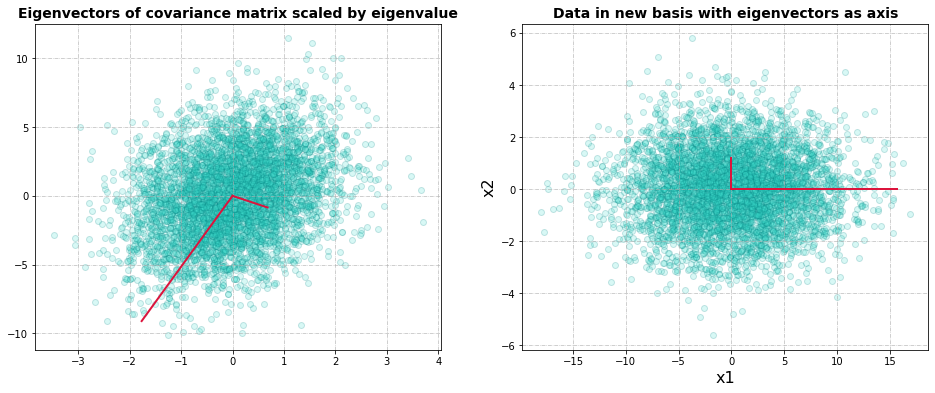

In [264]:
# Redefine the data in the basis yielded by the PCA procedure(keep only first two components ad use them as new basis)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1.scatter(data[0,:], data[1,:], c = "turquoise", ec = "teal", alpha=0.2)

# Scale factor for the lines 
scale_factor=0.6

for li, vi in zip(l, V.T): 
    ax1.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], color = "crimson", lw=2)

ax1.grid(linestyle="-.", linewidth=0.6)
ax1.set_title("Eigenvectors of covariance matrix scaled by eigenvalue",fontsize=14,fontweight='bold')

# Rotate all the data points accordingly to the new base (given by the eigenvectors we kept)
datarot = np.dot(V.T, data)
ax2.scatter(datarot[0,:], datarot[1,:], c = "turquoise", ec = "teal", alpha=0.2)

for li, vi in zip(l, np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], color = "crimson", lw=2)

ax2.grid(linestyle="-.", linewidth=0.6)
ax2.set_title("Data in new basis with eigenvectors as axis",fontsize=14,fontweight='bold')
ax2.set_xlabel("x1",fontsize=16)
ax2.set_ylabel("x2",fontsize=16)

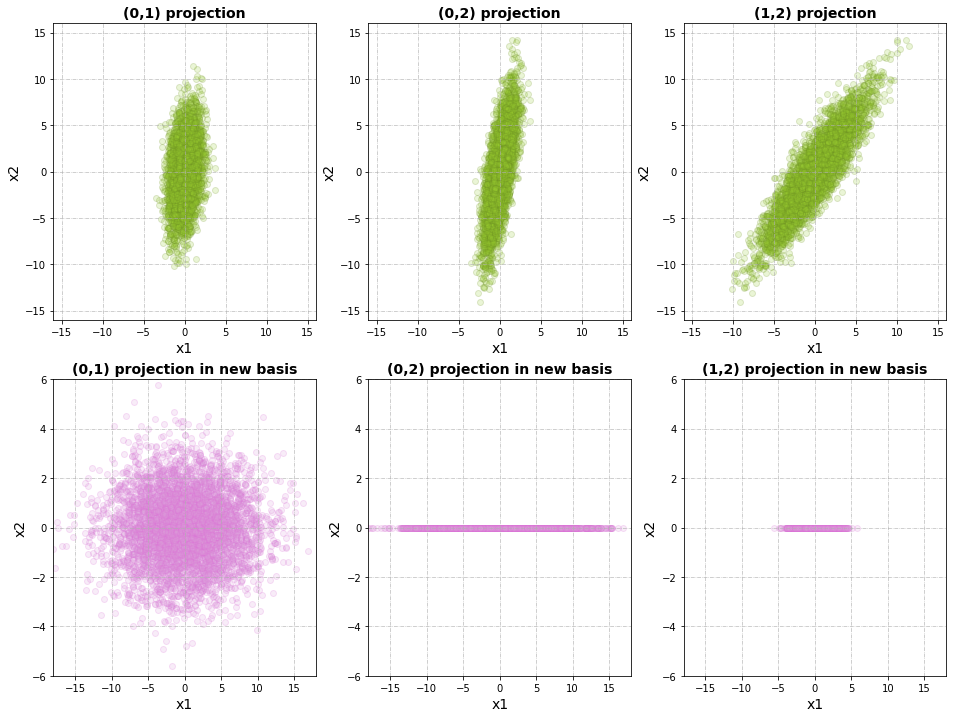

In [265]:
# Projections
fig = plt.figure(figsize=(16, 12))
fig.tight_layout()

for i in range(3):
    for j in range(i+1,3):
        ax = fig.add_subplot(2, 3, i+j)
        ax.scatter(data[i,:], data[j,:], c = "yellowgreen", ec = "olivedrab", alpha = 0.2)
        ax.set_title("(" + str(i) + "," + str(j)+") projection", fontsize=14, fontweight='bold')
        ax.set_xlabel("x1", fontsize=14)
        ax.set_ylabel("x2", fontsize=14)
        ax.grid(linestyle="-.", linewidth=0.6)
        plt.axis([-16,16,-16,16])
        
        axr = fig.add_subplot(2, 3, i+j+3)
        axr.scatter(datarot[i,:],datarot[j,:], c="plum", ec="orchid" , alpha = 0.2)
        axr.set_title("(" + str(i) + "," + str(j)+") projection in new basis", fontsize=14, fontweight='bold')
        plt.axis([-18,18,-6,6])
        axr.set_xlabel("x1", fontsize=14)
        axr.set_ylabel("x2", fontsize=14)
        axr.grid(linestyle="-.", linewidth=0.6)
 

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [266]:
# Add uncorrelated random noise (add other 10 variables to data)

for i in range(10):
    xn = np.random.normal(0, 1/50, N)
    datanoise = np.vstack((data,xn))
    data = datanoise


In [267]:
# Repeat PCA with new noisy dataset

# Find eigenvectors and eigenvalues of the covariance matrix
cov_mtrx_n = np.cov(datanoise)
ln, Vn = la.eig(cov_mtrx_n) 
ln = np.real_if_close(ln) #covariance matrix is semi-positive definite so its eigenvalues are real

#sorting them in non-increasing order as in la.svd() output
idxn = np.argsort(-ln)
ln = ln[idxn]
Vn = Vn[:,idxn]

#print("The covariance matrix of the dataset is:\n",cov_mtrx_n,'\n')
print("\n Eigenvalues and corresponding eigenvectors of the covariance matrix:")
for i in range(len(ln)):
    print("Eigenvalue: ", ln[i], "\n with eigenvector: ", Vn[:,i], '\n')



 Eigenvalues and corresponding eigenvectors of the covariance matrix:
Eigenvalue:  26.145291526165927 
 with eigenvector:  [-1.12534323e-01 -5.81010213e-01 -8.06078859e-01  7.49244093e-05
 -8.79601920e-05 -2.16510887e-06  1.06874461e-04 -1.58496100e-05
 -4.24504652e-05  2.74840228e-05 -3.80114987e-06 -4.77164777e-05
 -4.36780522e-05] 

Eigenvalue:  2.005056532869541 
 with eigenvector:  [-5.66276734e-01  7.04102560e-01 -4.28450908e-01 -1.79891304e-04
 -8.83815557e-05  4.74686269e-06 -5.85956380e-05 -2.47008602e-05
 -8.73100326e-05  5.05577638e-05  8.96537242e-05  4.18522922e-05
  1.40808762e-05] 

Eigenvalue:  0.0004257362752947592 
 with eigenvector:  [-7.61887281e-05  5.41978294e-05 -9.81796267e-05  2.93677873e-01
  8.86218068e-01  1.99778953e-01  6.30053171e-02 -1.30746784e-01
  1.21433620e-01  1.84499888e-01  3.93392671e-02  8.81694525e-02
  9.63692869e-02] 

Eigenvalue:  0.0004242456327224624 
 with eigenvector:  [-3.83594390e-05  6.72688573e-05 -9.45002060e-06 -2.36872869e-01
  

In [268]:
# Using SVD:
Un, spectrum_n, Vt_n = la.svd(cov_mtrx_n)

print("Using SVD we have: \n")
for i in range(len(ln)):
    print("Eigenvalue: ", spectrum_n[i], "\n with eigenvector: ", Un[:,i], '\n')


Using SVD we have: 

Eigenvalue:  26.145291526165924 
 with eigenvector:  [-1.12534323e-01 -5.81010213e-01 -8.06078859e-01  7.49244093e-05
 -8.79601920e-05 -2.16510887e-06  1.06874461e-04 -1.58496100e-05
 -4.24504652e-05  2.74840228e-05 -3.80114987e-06 -4.77164777e-05
 -4.36780522e-05] 

Eigenvalue:  2.00505653286954 
 with eigenvector:  [ 5.66276734e-01 -7.04102560e-01  4.28450908e-01  1.79891304e-04
  8.83815557e-05 -4.74686269e-06  5.85956380e-05  2.47008602e-05
  8.73100326e-05 -5.05577638e-05 -8.96537242e-05 -4.18522922e-05
 -1.40808762e-05] 

Eigenvalue:  0.0004257362752947584 
 with eigenvector:  [-7.61887281e-05  5.41978294e-05 -9.81796267e-05  2.93677873e-01
  8.86218068e-01  1.99778953e-01  6.30053171e-02 -1.30746784e-01
  1.21433620e-01  1.84499888e-01  3.93392671e-02  8.81694525e-02
  9.63692869e-02] 

Eigenvalue:  0.00042424563272246287 
 with eigenvector:  [ 3.83594390e-05 -6.72688573e-05  9.45002060e-06  2.36872869e-01
 -2.79909219e-01  1.04308539e-01 -3.57776946e-01 -3.

Notice that in this case also, SVD and eigendecomposition yield the same results except for the smallest eigenvalue for the reasons highlighted before. 

In [269]:
# Variability in principal components
var_n = np.zeros(13)
for i in range(len(ln)):
    var_n[i] = ln[i]/ln.sum()
    print("The eigenvalue", ln[i], "accounts for ", var_n[i]*100,"% of the variability of the dataset")

print("\n The 1st and 2nd eigenvalue account for ", (var_n[0]+var_n[1])*100,"% of the variability of the dataset")


The eigenvalue 26.145291526165927 accounts for  92.86413616540075 % of the variability of the dataset
The eigenvalue 2.005056532869541 accounts for  7.121658701008501 % of the variability of the dataset
The eigenvalue 0.0004257362752947592 accounts for  0.0015121511037639883 % of the variability of the dataset
The eigenvalue 0.0004242456327224624 accounts for  0.0015068565659437014 % of the variability of the dataset
The eigenvalue 0.00041744743110592715 accounts for  0.0014827103780931676 % of the variability of the dataset
The eigenvalue 0.0004087110373244545 accounts for  0.001451680023702003 % of the variability of the dataset
The eigenvalue 0.0004034518685624094 accounts for  0.0014330002486630977 % of the variability of the dataset
The eigenvalue 0.00040027223259186484 accounts for  0.0014217066607744506 % of the variability of the dataset
The eigenvalue 0.0003903273732613953 accounts for  0.0013863840188338844 % of the variability of the dataset
The eigenvalue 0.0003794600767560

As before, to keep at least 99% of the variability we have to keep only the first two eigenlvalues. Thus, we can carry out the procedure as before.

Text(0, 0.5, 'x2')

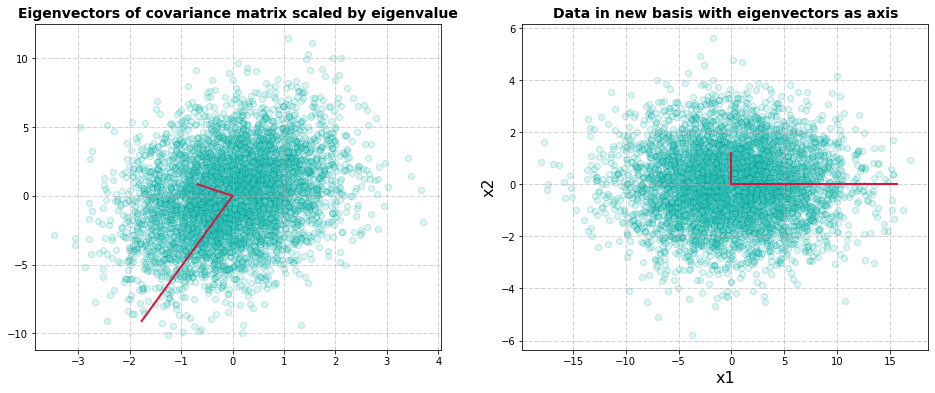

In [270]:
# Redefine the data in the basis yielded by the PCA procedure(keep only first two components ad use them as new basis)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1.scatter(datanoise[0,:], datanoise[1,:], c = "turquoise", ec = "teal", alpha=0.2)

# Scale factor for the lines 
scale_factor=0.6

for lin, vin in zip(ln, Vn.T): 
    ax1.plot([0, scale_factor*lin*vin[0]], [0, scale_factor*lin*vin[1]], color = "crimson", lw=2)

ax1.grid(linestyle="-.", linewidth=0.6)
ax1.set_title("Eigenvectors of covariance matrix scaled by eigenvalue",fontsize=14,fontweight='bold')

# Rotate all the data points accordingly to the new base (given by the eigenvectors we kept)
datarot_n = np.dot(Vn.T, datanoise)
ax2.scatter(datarot_n[0,:], datarot_n[1,:], c = "turquoise", ec = "teal", alpha=0.2)

for lin, vin in zip(ln, np.diag([1]*2)):
    plt.plot([0, scale_factor*lin*vin[0]], [0, scale_factor*lin*vin[1]], color = "crimson", lw=2)

ax2.grid(linestyle="-.", linewidth=0.6)
ax2.set_title("Data in new basis with eigenvectors as axis",fontsize=14,fontweight='bold')
ax2.set_xlabel("x1",fontsize=16)
ax2.set_ylabel("x2",fontsize=16)

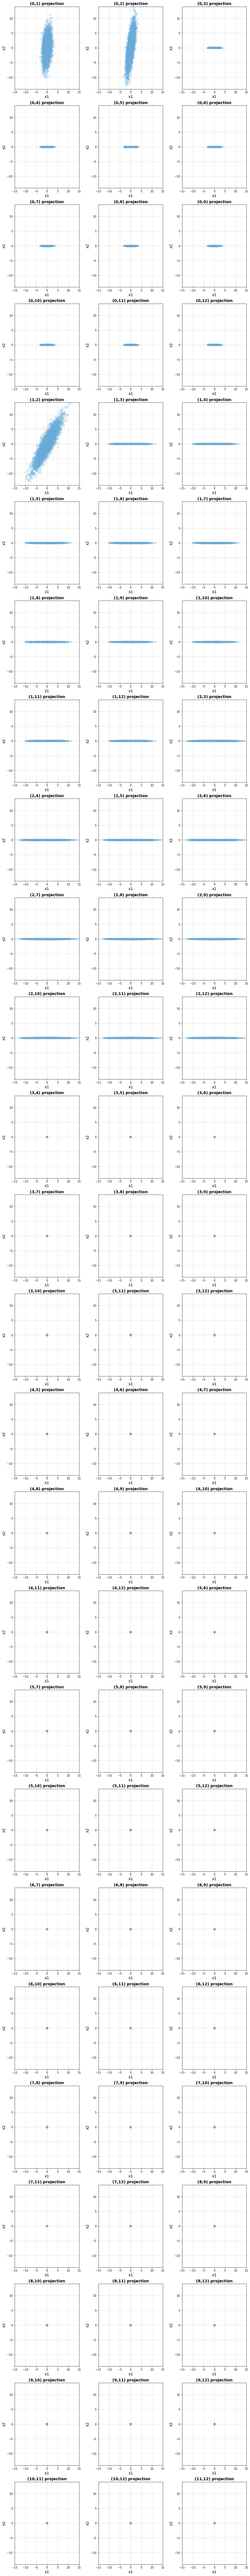

In [271]:
# Projections
fig = plt.figure(figsize=(15, 170))
fig.subplots_adjust(wspace = 0.3, hspace= 0.2)

pltcntr = 1

for i in range(13):
    for j in range(i+1,13):
        ax = fig.add_subplot(26, 3, pltcntr)
        ax.scatter(datanoise[i,:], datanoise[j,:], c = "lightskyblue", ec = "steelblue", alpha = 0.2)
        ax.set_title("(" + str(i) + "," + str(j)+") projection", fontsize=14, fontweight='bold')
        ax.set_xlabel("x1", fontsize=14)
        ax.set_ylabel("x2", fontsize=14)
        ax.grid(linestyle="-.", linewidth=0.6)
        plt.axis([-15,15,-14,14])
        pltcntr+=1
        


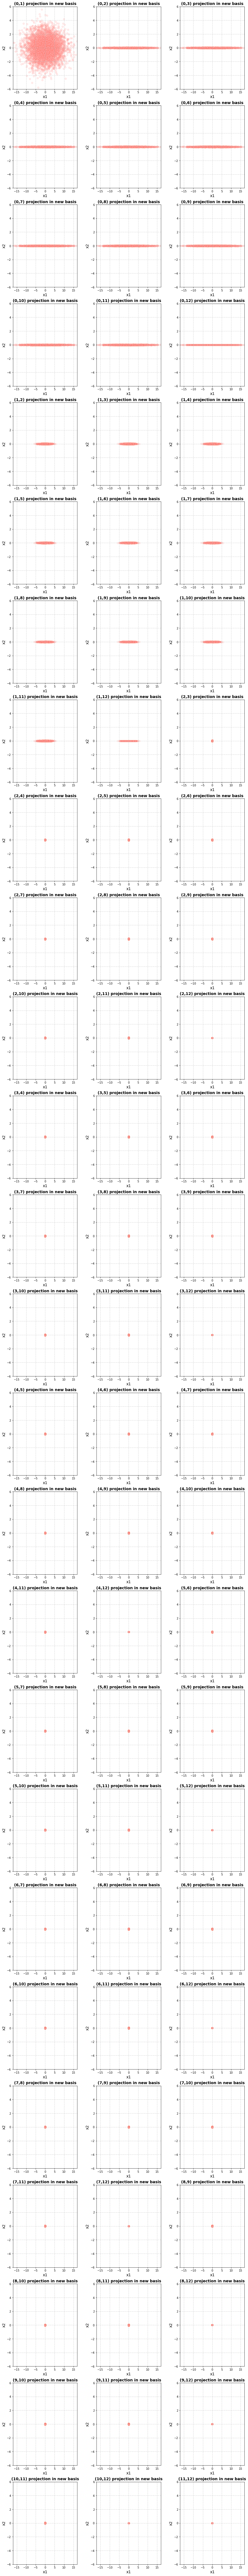

In [272]:
#In the new base
fig = plt.figure(figsize=(15, 170))
fig.subplots_adjust(wspace = 0.3, hspace= 0.2)

pltcntr = 1

for i in range(13):
    for j in range(i+1,13):
        axr = fig.add_subplot(26, 3, pltcntr)
        axr.scatter(datarot_n[i,:],datarot_n[j,:], c="lightpink", ec="tomato" , alpha = 0.2)
        axr.set_title("(" + str(i) + "," + str(j)+") projection in new basis", fontsize=14, fontweight='bold')
        plt.axis([-17,17,-6,6])
        axr.set_xlabel("x1", fontsize=14)
        axr.set_ylabel("x2", fontsize=14)
        axr.grid(linestyle="-.", linewidth=0.6)
        pltcntr+=1
 

We can see that despite the inclusion of some noise, the results of the PCA are basically the same as before.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 